# Lineárna regresia

In [1]:
# potrebujete mat verziu kniznice scikit-learn >= 0.20
from sklearn.datasets import fetch_openml

bodyfat = fetch_openml('bodyfat', version=1)

In [2]:
print(bodyfat.DESCR[:613])

**Author**: Roger W. Johnson  
**Source**: [UCI (not available anymore)](https://archive.ics.uci.edu/ml/index.php), [TunedIT](http://tunedit.org/repo/UCI/numeric/bodyfat.arff)  
**Please cite**: None. 

Short Summary:
Lists estimates of the percentage of body fat determined by underwater
weighing and various body circumference measurements for 252 men.

Classroom use of this data set:
This data set can be used to illustrate multiple regression techniques.
Accurate measurement of body fat is inconvenient/costly and it is
desirable to have easy methods of estimating body fat that are not
inconvenient/costly.


In [3]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

fat_df = pd.DataFrame(bodyfat.data, columns=bodyfat.feature_names)
fat_df.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23.0,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22.0,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22.0,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26.0,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24.0,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Ďalší opis dát nájdete tu: https://www.openml.org/d/560

Predikovaná (závislá) premenná je `Density`, ostatné atribúty môžete použiť ako prediktory.

## Úloha 1

Preskúmajte daný dataset - sú atribúty navzájom korelované? Ktoré atribúty korelujú so závislou premennou `Density`? Vizualizujte podstatné závislosti v dátach.

In [4]:
fat_df.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


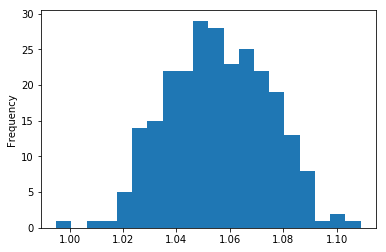

In [5]:
fat_df.Density.plot.hist(bins=20)

In [6]:
fat_df.corr()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
Age,-0.277637,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685
Knee,-0.495040,0.017516,0.853167,0.286053,0.672405,0.719496,0.737179,0.823473,0.799170,1.000000,0.611608,0.678709,0.555898,0.664507


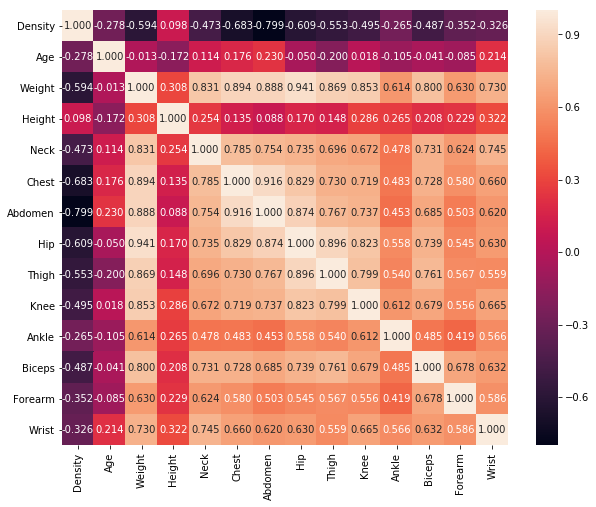

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(fat_df.corr(), annot=True, fmt=".3f")

Vidíme, že najviac korelujú (v absolútnej hodnote) s atribútom `Density` atribúty `Abdomen`, `Chest` a `Hip`. Tieto však korelujú silno aj navzájom, preto pridanie všetkých týchto atribútov nemusí významne pomôcť modelu (v porovnaní s tým, ak by do modelu vstupoval len jeden z nich). 

## Úloha 2

Rozdeľte dáta na trénovaciu a testovaciu množinu.

In [8]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(fat_df[fat_df.columns.difference(['Density'])],
                                                          fat_df.Density,
                                                          test_size=0.33,
                                                          random_state=42)

Normalizujeme dáta:

In [9]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(train)
train.loc[:,:] = scaler.transform(train)
test.loc[:,:] = scaler.transform(test)

## Úloha 3

1. Nad trénovacou množinou vyskúšajte viacero jednoduchých regresných modelov (t. j. s jedným atribútom) s využitím knižnice `statsmodels` aj `scikit-learn`. 
2. Preskúmajte modely pomocou výpisu funkcie `statsmdels`. Ktorý model lepšie vysvetľuje varianciu v dátach ($R^2$)?
3. Vizualizujte modely pomocou kombinácie scatter plotu a čiarového grafu. 
4. Porovnajte modely na testovacej vzorke pomocou metriky MSE, prípadne RMSE.

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

Výskúšame model s atribútom `Abdomen` ako prediktorom.

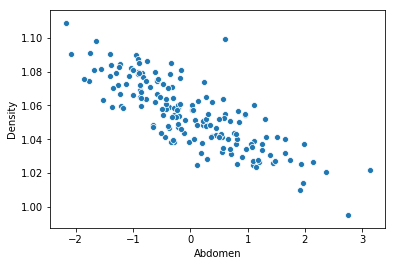

In [11]:
sns.scatterplot(train.Abdomen, train_labels)

In [12]:
y = train_labels
X = train.Abdomen
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     314.4
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           3.79e-40
Time:                        19:32:40   Log-Likelihood:                 508.00
No. Observations:                 168   AIC:                            -1012.
Df Residuals:                     166   BIC:                            -1006.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0551      0.001   1155.607      0.000       1.053       1.057
Abdomen       -0.0162      0.001    -17.731      0.000      -0.018      -0.014
==============================================================================
Omnibus:                       15.940   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.340
Skew:                           0.528   Prob(JB):                     5.18e-06
Kurtosis:                       4.537   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To isté pomocou knižnice `scikit-learn`.

In [13]:
y = train_labels
X = train[['Abdomen']]

lm = LinearRegression().fit(X, y)
print("R^2: %f" % lm.score(X, y))
print(lm.intercept_, lm.coef_)

R^2: 0.654449
1.055117857142857 [-0.01618923]


Vizualizujeme jednoduchý lineárny model:

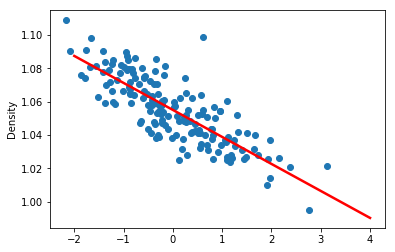

In [14]:
plt.plot(train.Abdomen, train_labels, "o")
plt.ylabel("Density")

abd = train[["Abdomen"]].values
xs = range(int(np.min(abd[:,0])), int(np.max(abd[:,0])+2))
ys = [lm.predict([[x]]) for x in xs]
plt.plot(xs, ys, 'r', linewidth=2.5)

Vidíme, že hodnota metriky $R^2$ je 0.654 - to znamená, že prediktor `Abdomen` vysvetľuje 65.4% variancie predikovanej premennej `Density` v trénovacích dátach. Pre porovnanie môžeme vyskúšať ďalšie modely.

In [15]:
y = train_labels
X = train.Chest
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     145.4
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.90e-24
Time:                        19:32:41   Log-Likelihood:                 471.58
No. Observations:                 168   AIC:                            -939.2
Df Residuals:                     166   BIC:                            -932.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0551      0.001    930.378      0.000       1.053       1.057
Chest         -0.0137      0.001    -12.057      0.000      -0.016      -0.011
==============================================================================
Omnibus:                       12.506   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.421
Skew:                           0.477   Prob(JB):                     0.000272
Kurtosis:                       4.198   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
y = train_labels
X = train.Hip
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     109.3
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           5.72e-20
Time:                        19:32:41   Log-Likelihood:                 461.22
No. Observations:                 168   AIC:                            -918.4
Df Residuals:                     166   BIC:                            -912.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0551      0.001    874.765      0.000       1.053       1.057
Hip           -0.0126      0.001    -10.453      0.000      -0.015      -0.010
==============================================================================
Omnibus:                        4.917   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.545
Skew:                           0.326   Prob(JB):                        0.103
Kurtosis:                       3.475   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podľa očakávaní najlepšie vysvetľuje varianciu v predikovanej premennej model a prediktorom `Abdomen`. Môžeme ich ešte porovnať na testovacej vzorke.

In [17]:
lm1 = LinearRegression().fit(train[['Abdomen']], train_labels)
lm2 = LinearRegression().fit(train[['Chest']], train_labels)
lm3 = LinearRegression().fit(train[['Hip']], train_labels)

In [18]:
from sklearn.metrics import mean_squared_error as mse

print(mse(test_labels, lm1.predict(test[['Abdomen']])))
print(mse(test_labels, lm2.predict(test[['Chest']])))
print(mse(test_labels, lm3.predict(test[['Hip']])))

0.00011868709376211286
0.0001522732548065403
0.00020342999511254516


Aj na základe metriky MSE (mean squared error) na testovacej množine je najlepší z testovaných modelov jednoduchej lineárnej regresie ten, ktorý využíva ako prediktor atribút `Abdomen`.

## Úloha 4

Vyskúšajte a porovnajte modely viacnásobnej lineárnej regresie - zvoľte podmnožinu atribútov, prípadne vytvorte model so všetkými atribútmi. Ktoré atribúty sú dobré prediktory? Je medzi prediktormi a predikovanou premennou štatisticky významný vzťah? Ako môžeme interpretovať koeficienty modelu?

My na ukážku rovno skúsime model so všetkými atribútmi - odporúčame však vyskúšať si aj kombinácie s rôznymi podmnožinami. Zároveň v praxi by sme najprv chceli odstrániť atribúty, ktoré sú navzájom vysoko korelované (nechali by sme z nich len tie, ktoré viac korelujú s predikovanou premennou), resp. mohli by sme skúsiť inú metódu výberu atribútov (čŕt).

In [19]:
y = train_labels
X = train
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     36.68
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.59e-40
Time:                        19:32:41   Log-Likelihood:                 537.19
No. Observations:                 168   AIC:                            -1046.
Df Residuals:                     154   BIC:                            -1003.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0551      0.001   1324.253      0.000       1.054       1.057
Abdomen       -0.0276      0.003    -10.220      0.000      -0.033      -0.022
Age           -0.0016      0.001     -1.371      0.172      -0.004       0.001
Ankle         -0.0014      0.001     -1.255      0.212      -0.004       0.001
Biceps        -0.0021      0.001     -1.421      0.157      -0.005       0.001
Chest          0.0015      0.003      0.575      0.566      -0.004       0.007
Forearm       -0.0006      0.001     -0.469      0.640      -0.003       0.002
Height         0.0006      0.001      0.578      0.564      -0.001       0.003
Hip            0.0039      0.003      1.322      0.188      -0.002       0.010
Knee        8.072e-05      0.002      0.047      0.962      -0.003       0.003
Neck           0.0016      0.002      1.035      0.302      -0.001       0.005
Thigh         -0.0039      0.002     -1.731      0.086      -0.008       0.001
Weight         0.0103      0.005      2.223      0.028       0.001       0.020
Wrist          0.0029      0.002      1.851      0.066      -0.000       0.006
==============================================================================
Omnibus:                        1.421   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                1.310
Skew:                           0.216   Prob(JB):                        0.519
Kurtosis:                       2.975   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Na základe tohto výtupu vieme povedať viacero vecí:

- celkovo je medzi prediktormi a predikovanou premennou štatisticky významný vzťah (to nám hovorí `Prob (F-statistic)`, ktorého hodnota je menšia ako 0.05)

- model vysvetľuje 73.5% variancie (keďže máme model s viacerými prediktormi, uprednostňujeme výsledok Adjusted-$R^2$)

- nie všetky atribúty sú štatisticky významné - o tom, či sú alebo nie, hovorí stĺpec `P > |t|`, ktorý predstavuje p-hodnotu. Ak je jeho hodnota pre daný atribút vyššia ako 0.05, znamená to, že sme nezamietli nulovú hypotézu, že jeho koeficient je nulový (teda neprispieva k vysvetleniu variancie). Na základe toho môžeme povedať, že významné atribúty sú len `Abdomen` a `Weight` (plus konštanta, teda `intercept`). To, že aj atribúty, ktoré relatívno silno korelovali s predikovanou premennou, vyšli ako nevyznamné, je spôsobené tým, že zároveň boli vysoko korelované s atribútom `Abdomen`, a teda neprinášali oproti nemu žiadnu (alebo len malú) dodatočnú informáciu.

- ak by sme chceli napísať predpis priamky lineárnej regresie, použili by sme stĺpec `coef`. S využitím všetkých atribútov by bol predpis nasledovný:

$$ Density = 1.0551 -0.0276 \times Abdomen -0.0016 \times Age -0.0014 \times Ankle + \dots + 0.0103 \times Weight + 0.0029 \times Wrist $$

# Logistická regresia

In [20]:
from sklearn import datasets

wine = datasets.load_wine()

In [21]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [22]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [23]:
target = wine.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## Úloha 5

Vašou úlohou je zaklasifikovať vína do jednej z troch tried pomocou logistickej regresie. 

1. Postupujte analogicky k úlohám 1-4. Použite knižnicu `scikit-learn`, ale aj `statsmodels`. Aké metriky sa používajú na vyhodnotenie klasifikácie?
2. Logistická regresia je v základnom nastavení binárny klasifikátor. Akú stratégiu používa implementácia v knižnici `scikit-learn`, aby bola schopná predikovať viac ako dve triedy? Pre viac info pozrite tu: https://scikit-learn.org/stable/modules/multiclass.html

In [24]:
wine_df['target'] = target

Rozloženie tried:

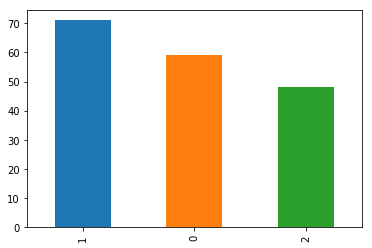

In [25]:
wine_df.target.value_counts().plot.bar()

Korelácie:

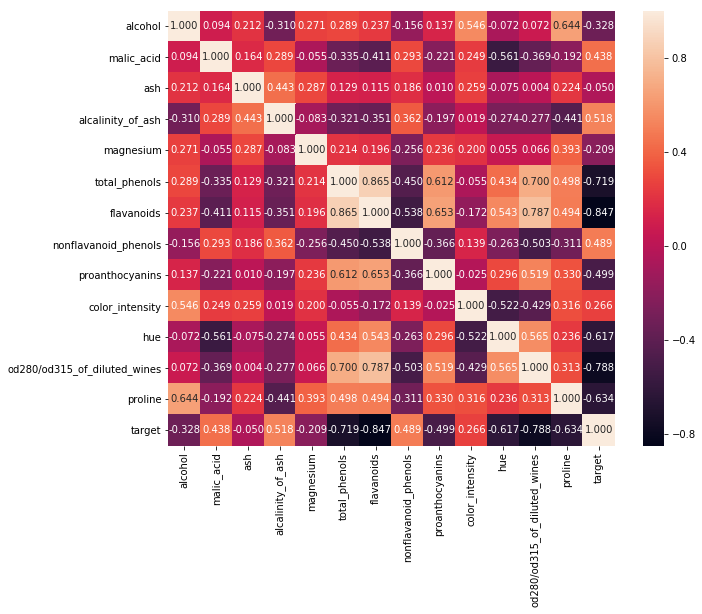

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(wine_df.corr(), annot=True, fmt=".3f")

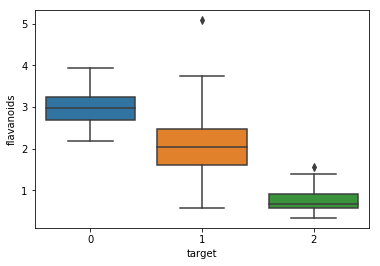

In [27]:
sns.boxplot('target', 'flavanoids', data=wine_df)

Na základe korelácie s predikovanou premennou vidíme potenciálne dobré prediktory. Môžeme si ich bližšie vizualizovať pomocou boxplotov ako je napr. ten vyššie, aby sme videli či hodnoty atribútu naozaj dokážu rozlíšiť jednotlivé triedy.

Preskočíme krok vytvárania jednoduchých modelov a rovno vytvoríme model so všetkými atribútmi (hoci platí rovnaká poznámka o výbere atribútov ako pri lineárnej regresii). Atribúty normalizujeme, aby ich váhy (koeficienty) vyjadrovali dôležitosť atribútov.

In [28]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(wine_df[wine_df.columns.difference(['target'])],
                                                          target,
                                                          test_size=0.33,
                                                          random_state=42)

In [29]:
scaler = preprocessing.StandardScaler().fit(train)
train.loc[:,:] = scaler.transform(train)
test.loc[:,:] = scaler.transform(test)

Použijeme len implementáciu logistickej regresie z knižnice `scikit-learn`. Ak by sme chceli použiť knižnicu `statsmodels`, možeme využit modul `statsmodels.discrete.discrete_model.Logit` v prípade dvoch tried a `statsmodels.discrete.discrete_model.MNLogit` v prípade viac ako dvoch tried.

In [30]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logit.fit(train, train_labels)
preds = logit.predict(test)

Využívame prístup pre viaceré triedy (`multi_class='multinomial'`). Ak by sme hodnotu zmenili na `ovr`, použil by sa *one-vs-rest* prístup, t. j. trénovalo by sa *k* klasifikátorov (pre každú triedu jeden, čiže v našom prípade tri).

In [31]:
logit.coef_

array([[-0.83637175,  0.78468983,  0.44933607,  0.16001311,  0.51622324,
         0.07485755,  0.04708542,  0.11049523, -0.04573609,  0.60140599,
         0.20092856,  0.89864785,  0.35367888],
       [ 0.71180864, -1.02418548, -0.82257448, -0.81935374,  0.34446506,
         0.72782535, -0.10945195, -0.29362067,  0.08036234,  0.12710915,
         0.37274197, -0.96284127, -0.16509604],
       [ 0.12456311,  0.23949564,  0.37323841,  0.65934063, -0.8606883 ,
        -0.80268289,  0.06236653,  0.18312544, -0.03462625, -0.72851515,
        -0.57367054,  0.06419341, -0.18858284]])

In [32]:
logit.score(test, test_labels)

0.9830508474576272

Funkcia `score` vracia pri klasifikácii metriku `accuracy`, čiže správnosť. Jednoducho vieme získať výslekdy ďalších metrík na vyhodnotenie klasifikácie.

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

confusion_matrix(test_labels, preds)

array([[20,  0,  0],
       [ 0, 23,  1],
       [ 0,  0, 15]], dtype=int64)

In [34]:
precision_score(test_labels, preds, average='macro')

0.9791666666666666

In [35]:
recall_score(test_labels, preds, average='macro')

0.9861111111111112

In [36]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, preds, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        20
           1    1.00000   0.95833   0.97872        24
           2    0.93750   1.00000   0.96774        15

   micro avg    0.98305   0.98305   0.98305        59
   macro avg    0.97917   0.98611   0.98216        59
weighted avg    0.98411   0.98305   0.98314        59

